In [ ]:
import yfinance as yf
import pandas as pd


In [ ]:
# Downloading the historical data for NIFTY 50
hj18_nifty50 = yf.download("^NSEI", start="2007-09-17", end="2025-03-25")
print("NIFTY 50 Data:")
hj18_nifty50.head()


[*********************100%***********************]  1 of 1 completed

NIFTY 50 Data:


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [ ]:
# Downloading historical data for Tata Motors
hj18_tata_motors= yf.download("TATAMOTORS.NS", start="2007-09-17", end="2025-03-25")
print("\nTata Motors Data:")
hj18_tata_motors.head()


[*********************100%***********************]  1 of 1 completed


Tata Motors Data:


Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2007-09-17,118.589859,119.144618,117.531554,119.144618,3085853
2007-09-18,118.820282,119.656689,118.146038,119.144607,2131042
2007-09-19,122.968163,125.451763,119.485993,119.998074,7106453
2007-09-20,124.820190,127.645187,123.582665,124.419072,6752282
2007-09-21,126.484474,127.440366,122.899891,122.899891,5263026


In [ ]:
# Save NIFTY 50 data to CSV
hj18_nifty50.to_csv('nifty50.csv')

# Save Tata Motors data to CSV
hj18_tata_motors.to_csv('tata_motors.csv')

print("CSV files saved successfully!")


CSV files saved successfully!


## Preprocessing

In [ ]:
# Make a copy of the original data
hj18_tata_motors_cleaned = hj18_tata_motors.copy()
hj18_nifty50_cleaned = hj18_nifty50.copy()

# Keeping only the 'Close' price column
hj18_tata_motors_cleaned = hj18_tata_motors_cleaned['Close']
hj18_nifty50_cleaned = hj18_nifty50_cleaned['Close']

# Converting index to datetime format
hj18_tata_motors_cleaned.index = pd.to_datetime(hj18_tata_motors_cleaned.index)
hj18_nifty50_cleaned.index = pd.to_datetime(hj18_nifty50_cleaned.index)

# Display cleaned data
print("Tata Motors Cleaned Data:")
hj18_tata_motors_cleaned.head()

print("\nNIFTY 50 Cleaned Data:")
hj18_nifty50_cleaned.head()


Tata Motors Cleaned Data:

NIFTY 50 Cleaned Data:


Ticker,^NSEI
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [ ]:
# Make a copy of the original Tata Motors data
hj18_tata_motors_cleaned = hj18_tata_motors.copy()

# Keeping only the 'Close' price column
hj18_tata_motors_cleaned = hj18_tata_motors_cleaned['Close']

# Converting index to datetime format
hj18_tata_motors_cleaned.index = pd.to_datetime(hj18_tata_motors_cleaned.index)

# Display cleaned Tata Motors data
print("Tata Motors Cleaned Data:")
hj18_tata_motors_cleaned.head()


Tata Motors Cleaned Data:


Ticker,TATAMOTORS.NS
Date,
2007-09-17,118.589859
2007-09-18,118.820282
2007-09-19,122.968163
2007-09-20,124.820190
2007-09-21,126.484474


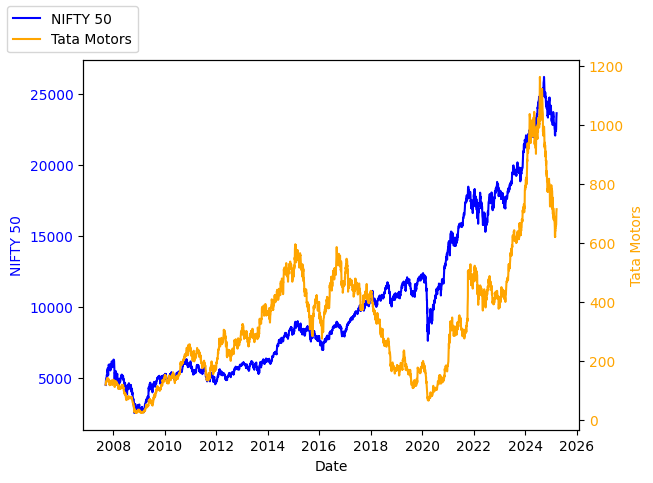

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object for the primary axis
fig, ax1 = plt.subplots()

# Plot NIFTY 50 data on the primary axis
ax1.plot(hj18_nifty50_cleaned.index, hj18_nifty50_cleaned, label='NIFTY 50', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('NIFTY 50', color='b')
ax1.tick_params('y', labelcolor='b')

# Create a secondary axis object that shares the x-axis with the primary axis
ax2 = ax1.twinx()

# Plot Tata Motors data on the secondary axis (replace tata_motors with Tata Motors)
ax2.plot(hj18_tata_motors_cleaned.index, hj18_tata_motors_cleaned, label='Tata Motors', color='orange')
ax2.set_ylabel('Tata Motors', color='orange')
ax2.tick_params('y', labelcolor='orange')

# Add a legend
fig.legend(loc='upper left')

# Display the plot
plt.show()


In [ ]:
import numpy as np
import datetime
import pandas as pd

def hj18_str_to_datetime(hj18_s):
    hj18_split = hj18_s.split('-')
    hj18_year, hj18_month, hj18_day = int(hj18_split[0]), int(hj18_split[1]), int(hj18_split[2])
    return datetime.datetime(year=hj18_year, month=hj18_month, day=hj18_day)

def hj18_df_to_windowed_df(hj18_dataframe, hj18_first_date_str, hj18_last_date_str, hj18_n=3):
    hj18_first_date = hj18_str_to_datetime(hj18_first_date_str)
    hj18_last_date = hj18_str_to_datetime(hj18_last_date_str)

    hj18_dates = []
    hj18_X, hj18_Y = [], []

    hj18_current_date = hj18_first_date

    while hj18_current_date <= hj18_last_date:
        hj18_window = []
        hj18_temp_date = hj18_current_date

        # Find the values for the previous n valid trading days
        for i in range(hj18_n):
            hj18_temp_date -= datetime.timedelta(days=1)
            while hj18_temp_date >= hj18_dataframe.index[0]:
                hj18_temp_date_dt = pd.to_datetime(hj18_temp_date)
                if hj18_temp_date_dt in pd.to_datetime(hj18_dataframe.index):
                    hj18_window.insert(0, hj18_dataframe.loc[hj18_temp_date_dt])
                    break
                hj18_temp_date -= datetime.timedelta(days=1)
            else:  # break out if we are out of dates.
                break

        # Check if we have enough data for the window
        if len(hj18_window) == hj18_n and pd.to_datetime(hj18_current_date) in pd.to_datetime(hj18_dataframe.index):
            hj18_X.append(hj18_window)
            hj18_Y.append(hj18_dataframe.loc[pd.to_datetime(hj18_current_date)])
            hj18_dates.append(hj18_current_date)

        hj18_current_date += datetime.timedelta(days=1)

    hj18_ret_df = pd.DataFrame({})
    hj18_ret_df['Target Date'] = hj18_dates

    hj18_X = np.array(hj18_X)
    for hj18_i in range(0, hj18_n):
        hj18_ret_df[f'Target-{hj18_n-hj18_i}'] = hj18_X[:, hj18_i]

    hj18_ret_df['Target'] = hj18_Y

    return hj18_ret_df


In [ ]:
hj18_nifty50_df = hj18_df_to_windowed_df(hj18_nifty50_cleaned,
                                          '2007-09-20',
                                          '2025-03-24', 3)

hj18_nifty50_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2007-09-20,4494.649902,4546.200195,4732.350098,Ticker ^NSEI 4747.549805 Name: 2007-09-20 0...
1,2007-09-21,4546.200195,4732.350098,4747.549805,Ticker ^NSEI 4837.549805 Name: 2007-09-21 0...
2,2007-09-24,4732.350098,4747.549805,4837.549805,Ticker ^NSEI 4932.200195 Name: 2007-09-24 0...
3,2007-09-25,4747.549805,4837.549805,4932.200195,Ticker ^NSEI 4938.850098 Name: 2007-09-25 0...
4,2007-09-26,4837.549805,4932.200195,4938.850098,Ticker ^NSEI 4940.5 Name: 2007-09-26 00:00:...
...,...,...,...,...,...
4287,2025-03-18,22470.500000,22397.199219,22508.750000,Ticker ^NSEI 22834.300781 Name: 2025-03-18 ...
4288,2025-03-19,22397.199219,22508.750000,22834.300781,Ticker ^NSEI 22907.599609 Name: 2025-03-19 ...
4289,2025-03-20,22508.750000,22834.300781,22907.599609,Ticker ^NSEI 23190.650391 Name: 2025-03-20 ...
4290,2025-03-21,22834.300781,22907.599609,23190.650391,Ticker ^NSEI 23350.400391 Name: 2025-03-21 ...


In [ ]:
# Process Tata Motors data with a window size of 3 and specified date range
hj18_tata_motors_df = hj18_df_to_windowed_df(hj18_tata_motors_cleaned,
                                              '2007-09-20',
                                              '2025-03-25',
                                              3)
hj18_tata_motors_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2007-09-20,118.589859,118.820282,122.968163,Ticker TATAMOTORS.NS 124.82019 Name: 2007-0...
1,2007-09-21,118.820282,122.968163,124.820190,Ticker TATAMOTORS.NS 126.484474 Name: 2007-...
2,2007-09-24,122.968163,124.820190,126.484474,Ticker TATAMOTORS.NS 127.54277 Name: 2007-0...
3,2007-09-25,124.820190,126.484474,127.542770,Ticker TATAMOTORS.NS 126.467407 Name: 2007-...
4,2007-09-26,126.484474,127.542770,126.467407,Ticker TATAMOTORS.NS 126.296707 Name: 2007-...
...,...,...,...,...,...
4311,2025-03-18,668.299988,655.500000,661.049988,Ticker TATAMOTORS.NS 661.049988 Name: 2025-...
4312,2025-03-19,655.500000,661.049988,661.049988,Ticker TATAMOTORS.NS 682.25 Name: 2025-03-1...
4313,2025-03-20,661.049988,661.049988,682.250000,Ticker TATAMOTORS.NS 690.049988 Name: 2025-...
4314,2025-03-21,661.049988,682.250000,690.049988,Ticker TATAMOTORS.NS 702.950012 Name: 2025-...


In [ ]:
hj18_nifty50_df.to_csv('nifty50_windowed_df.csv')
hj18_tata_motors_df.to_csv('tata_motors_windowed_df.csv')

In [ ]:
import pandas as pd

# Load the NIFTY 50 windowed DataFrame
hj18_nifty50_df = pd.read_csv('nifty50_windowed_df.csv')

# Load the Tata Motors windowed DataFrame (adjusted for Tata Motors)
hj18_tata_motors_df = pd.read_csv('tata_motors_windowed_df.csv')


In [ ]:
import numpy as np

def hj18_windowed_df_to_date_X_y(hj18_windowed_dataframe):
    hj18_df_as_np = hj18_windowed_dataframe.to_numpy()

    hj18_dates = hj18_df_as_np[:, 0]

    hj18_middle_matrix = hj18_df_as_np[:, 1:-1]
    hj18_X = hj18_middle_matrix.reshape((len(hj18_dates), hj18_middle_matrix.shape[1], 1))

    hj18_Y = hj18_df_as_np[:, -1]

    return hj18_dates, hj18_X.astype(np.float32), hj18_Y.astype(np.float32)


In [ ]:
# Nifty 50
import numpy as np

def hj18_windowed_df_to_date_X_y(hj18_windowed_dataframe):
    hj18_df_as_np = hj18_windowed_dataframe.to_numpy()

    hj18_dates_nifty = hj18_df_as_np[:, 0]

    hj18_middle_matrix = hj18_df_as_np[:, 1:-1]

    # Convert middle_matrix to numeric, handling errors
    hj18_middle_matrix = np.array([[np.nan if not str(val).isnumeric() else float(val) for val in row] for row in hj18_middle_matrix])

    hj18_X = hj18_middle_matrix.reshape((len(hj18_dates_nifty), hj18_middle_matrix.shape[1], 1)) #use hj18_dates_nifty

    hj18_Y = hj18_df_as_np[:, -1]

    # Convert Y to numeric, handling errors
    hj18_Y = np.array([np.nan if not str(val).isnumeric() else float(val) for val in hj18_Y])

    return hj18_dates_nifty, hj18_X.astype(np.float32), hj18_Y.astype(np.float32)

# Call the function to assign values to the variables
hj18_dates_nifty, hj18_X_nifty, hj18_y_nifty = hj18_windowed_df_to_date_X_y(hj18_nifty50_df) #calling the function with nifty50_df as input

# Now you can access the shape attributes
hj18_dates_nifty.shape, hj18_X_nifty.shape, hj18_y_nifty.shape

((4292,), (4292, 4, 1), (4292,))

In [ ]:
# Tata Motors
import numpy as np

def hj18_windowed_df_to_date_X_y(hj18_windowed_dataframe):
    hj18_df_as_np = hj18_windowed_dataframe.to_numpy()

    hj18_dates = hj18_df_as_np[:, 0]  # Assuming the first column is the date

    # Select columns 1 to -2 (excluding the first and last columns)
    hj18_middle_matrix = hj18_df_as_np[:, 1:-1]

    # Convert middle_matrix to numeric, handling errors
    hj18_middle_matrix = np.array([[np.nan if not str(val).isnumeric() else float(val) for val in row] for row in hj18_middle_matrix])

    hj18_X = hj18_middle_matrix.reshape((len(hj18_dates), hj18_middle_matrix.shape[1], 1))

    # Select the last column as Y (target)
    hj18_Y = hj18_df_as_np[:, -1]

    # Convert Y to numeric, handling errors
    hj18_Y = np.array([np.nan if not str(val).isnumeric() else float(val) for val in hj18_Y])

    return hj18_dates, hj18_X.astype(np.float32), hj18_Y.astype(np.float32)

# Call the function with tata_motors_df to get the variables
hj18_dates_tata_motors, hj18_X_tata_motors, hj18_y_tata_motors = hj18_windowed_df_to_date_X_y(hj18_tata_motors_df) #calling the function with tata_motors_df as input


# Check the shapes of the output arrays for Tata Motors
hj18_dates_tata_motors.shape, hj18_X_tata_motors.shape, hj18_y_tata_motors.shape

((4316,), (4316, 4, 1), (4316,))

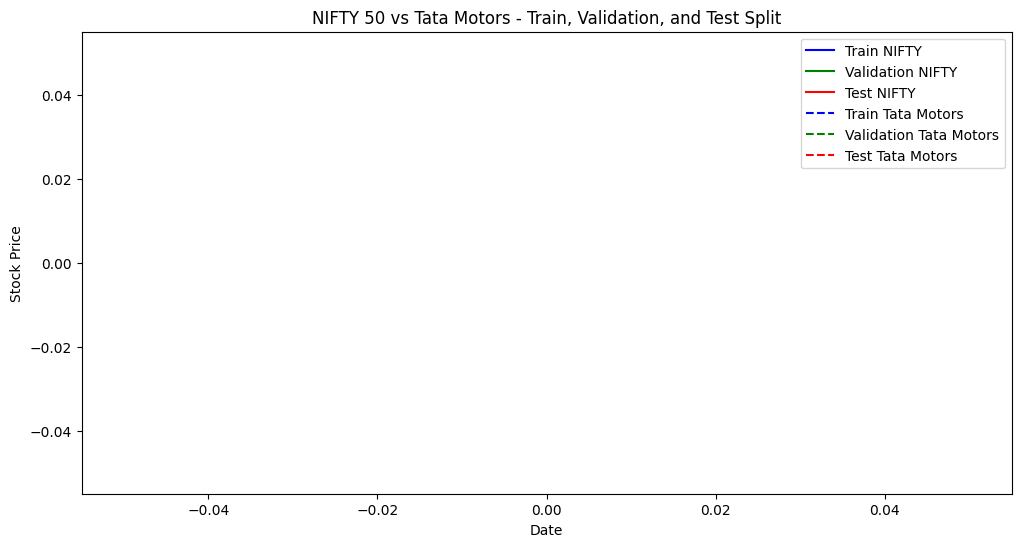

In [ ]:
import matplotlib.pyplot as plt

# Splitting NIFTY 50 data
hj18_q_80_nifty = int(len(hj18_dates_nifty) * 0.8)
hj18_q_90_nifty = int(len(hj18_dates_nifty) * 0.9)

hj18_dates_train_nifty, hj18_X_train_nifty, hj18_y_train_nifty = hj18_dates_nifty[:hj18_q_80_nifty], hj18_X_nifty[:hj18_q_80_nifty], hj18_y_nifty[:hj18_q_80_nifty]
hj18_dates_val_nifty, hj18_X_val_nifty, hj18_y_val_nifty = hj18_dates_nifty[hj18_q_80_nifty:hj18_q_90_nifty], hj18_X_nifty[hj18_q_80_nifty:hj18_q_90_nifty], hj18_y_nifty[hj18_q_80_nifty:hj18_q_90_nifty]
hj18_dates_test_nifty, hj18_X_test_nifty, hj18_y_test_nifty = hj18_dates_nifty[hj18_q_90_nifty:], hj18_X_nifty[hj18_q_90_nifty:], hj18_y_nifty[hj18_q_90_nifty:]

# Splitting Tata Motors data
hj18_q_80_tata = int(len(hj18_dates_tata_motors) * 0.8)
hj18_q_90_tata = int(len(hj18_dates_tata_motors) * 0.9)

hj18_dates_train_tata, hj18_X_train_tata, hj18_y_train_tata = hj18_dates_tata_motors[:hj18_q_80_tata], hj18_X_tata_motors[:hj18_q_80_tata], hj18_y_tata_motors[:hj18_q_80_tata]
hj18_dates_val_tata, hj18_X_val_tata, hj18_y_val_tata = hj18_dates_tata_motors[hj18_q_80_tata:hj18_q_90_tata], hj18_X_tata_motors[hj18_q_80_tata:hj18_q_90_tata], hj18_y_tata_motors[hj18_q_80_tata:hj18_q_90_tata]
hj18_dates_test_tata, hj18_X_test_tata, hj18_y_test_tata = hj18_dates_tata_motors[hj18_q_90_tata:], hj18_X_tata_motors[hj18_q_90_tata:], hj18_y_tata_motors[hj18_q_90_tata:]

# Plot NIFTY 50
plt.figure(figsize=(12, 6))
plt.plot(hj18_dates_train_nifty, hj18_y_train_nifty, color='blue')
plt.plot(hj18_dates_val_nifty, hj18_y_val_nifty, color='green')
plt.plot(hj18_dates_test_nifty, hj18_y_test_nifty, color='red')

# Plot Tata Motors
plt.plot(hj18_dates_train_tata, hj18_y_train_tata, linestyle='dashed', color='blue')
plt.plot(hj18_dates_val_tata, hj18_y_val_tata, linestyle='dashed', color='green')
plt.plot(hj18_dates_test_tata, hj18_y_test_tata, linestyle='dashed', color='red')

plt.legend(['Train NIFTY', 'Validation NIFTY', 'Test NIFTY',
            'Train Tata Motors', 'Validation Tata Motors', 'Test Tata Motors'])

plt.title("NIFTY 50 vs Tata Motors - Train, Validation, and Test Split")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


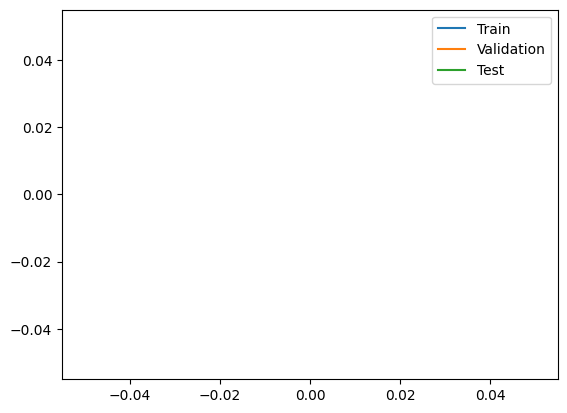

In [ ]:
hj18_q_80_tata_motors = int(len(hj18_dates_tata_motors) * .8)
hj18_q_90_tata_motors = int(len(hj18_dates_tata_motors) * .9)

hj18_dates_train_tata_motors, hj18_X_train_tata_motors, hj18_y_train_tata_motors = hj18_dates_tata_motors[:hj18_q_80_tata_motors], hj18_X_tata_motors[:hj18_q_80_tata_motors], hj18_y_tata_motors[:hj18_q_80_tata_motors]

hj18_dates_val_tata_motors, hj18_X_val_tata_motors, hj18_y_val_tata_motors = hj18_dates_tata_motors[hj18_q_80_tata_motors:hj18_q_90_tata_motors], hj18_X_tata_motors[hj18_q_80_tata_motors:hj18_q_90_tata_motors], hj18_y_tata_motors[hj18_q_80_tata_motors:hj18_q_90_tata_motors]
hj18_dates_test_tata_motors, hj18_X_test_tata_motors, hj18_y_test_tata_motors = hj18_dates_tata_motors[hj18_q_90_tata_motors:], hj18_X_tata_motors[hj18_q_90_tata_motors:], hj18_y_tata_motors[hj18_q_90_tata_motors:]

plt.plot(hj18_dates_train_tata_motors, hj18_y_train_tata_motors)
plt.plot(hj18_dates_val_tata_motors, hj18_y_val_tata_motors)
plt.plot(hj18_dates_test_tata_motors, hj18_y_test_tata_motors)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object for Nifty
hj18_scaler_nifty = MinMaxScaler()

# Reshape the data for scaling (if necessary)
hj18_X_train_nifty_reshaped = hj18_X_train_nifty.reshape(-1, 1)
hj18_y_train_nifty_reshaped = hj18_y_train_nifty.reshape(-1, 1)

# Fit the scaler to the training data and transform it
hj18_X_train_nifty_scaled = hj18_scaler_nifty.fit_transform(hj18_X_train_nifty_reshaped).reshape(hj18_X_train_nifty.shape)
hj18_y_train_nifty_scaled = hj18_scaler_nifty.fit_transform(hj18_y_train_nifty_reshaped).reshape(hj18_y_train_nifty.shape)


# Scale validation and testing data using the fitted scaler
hj18_X_val_nifty_scaled = hj18_scaler_nifty.transform(hj18_X_val_nifty.reshape(-1, 1)).reshape(hj18_X_val_nifty.shape)
hj18_y_val_nifty_scaled = hj18_scaler_nifty.transform(hj18_y_val_nifty.reshape(-1, 1)).reshape(hj18_y_val_nifty.shape)

hj18_X_test_nifty_scaled = hj18_scaler_nifty.transform(hj18_X_test_nifty.reshape(-1, 1)).reshape(hj18_X_test_nifty.shape)
hj18_y_test_nifty_scaled = hj18_scaler_nifty.transform(hj18_y_test_nifty.reshape(-1, 1)).reshape(hj18_y_test_nifty.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
# Model for Nifty
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

hj18_model_nifty = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(128, return_sequences=True),  # Increased units, return sequences for stacked LSTM
    layers.LSTM(64),  # Added another LSTM layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),  # Added dropout for regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

hj18_model_nifty.compile(loss='mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['mean_absolute_error'])

hj18_model_nifty.fit(hj18_X_train_nifty_scaled, hj18_y_train_nifty_scaled,
                    validation_data=(hj18_X_val_nifty_scaled, hj18_y_val_nifty_scaled),
                    epochs=100,
                    callbacks=[lr_scheduler])

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan - learning_rate: 0.0010
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan - learning_rate: 0.0010
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan - learning_rate: 0.0010
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan - learning_rate: 0.0010
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan - learning_rate: 0.0010
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan - learning_rate: 2.0000e-04
Epoch 7/100


In [ ]:
# Model for tata_motors
hj18_model_tata_motors = Sequential([layers.Input((3, 1)),
                          layers.LSTM(64),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(1)])

hj18_model_tata_motors.compile(loss='mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['mean_absolute_error'])

hj18_model_tata_motors.fit(hj18_X_train_tata_motors, hj18_y_train_tata_motors, validation_data=(hj18_X_val_tata_motors, hj18_y_val_tata_motors), epochs=100)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 8/100
108/108 ━━━━━

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


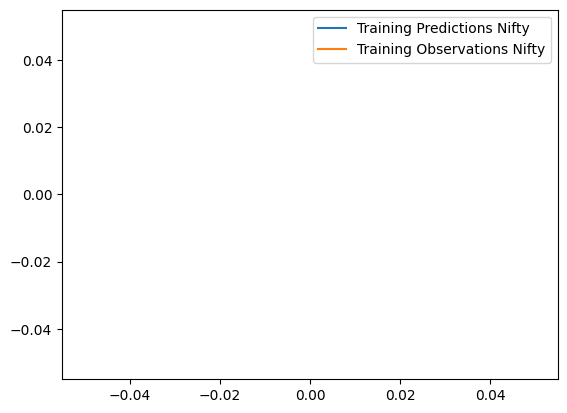

In [ ]:
# For Nifty
hj18_train_predictions_nifty = hj18_model_nifty.predict(hj18_X_train_nifty).flatten()

# Reshape to 2D for inverse_transform
hj18_train_predictions_nifty_2d = hj18_train_predictions_nifty.reshape(-1, 1)

# Inverse transform
hj18_train_predictions_nifty_original = hj18_scaler_nifty.inverse_transform(hj18_train_predictions_nifty_2d)

# Reshape back to 1D for plotting (if necessary)
hj18_train_predictions_nifty_original = hj18_train_predictions_nifty_original.flatten()

plt.plot(hj18_dates_train_nifty, hj18_train_predictions_nifty_original)
plt.plot(hj18_dates_train_nifty, hj18_y_train_nifty)
plt.legend(['Training Predictions Nifty', 'Training Observations Nifty'])



In [ ]:
hj18_train_predictions_nifty.min()

np.float32(nan)

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


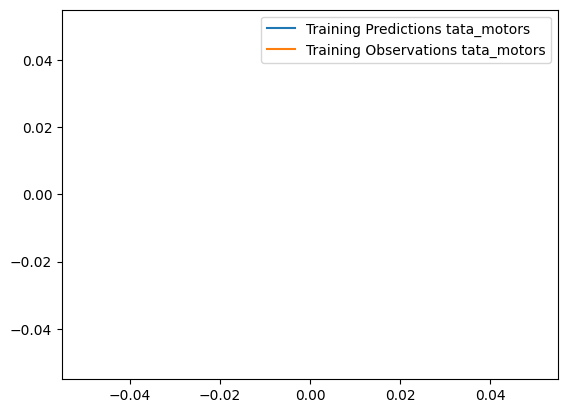

In [ ]:
# For tata_motors
hj18_train_predictions_tata_motors = hj18_model_tata_motors.predict(hj18_X_train_tata_motors).flatten()

plt.plot(hj18_dates_train_tata_motors, hj18_train_predictions_tata_motors)
plt.plot(hj18_dates_train_tata_motors, hj18_y_train_tata_motors)
plt.legend(['Training Predictions tata_motors', 'Training Observations tata_motors'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

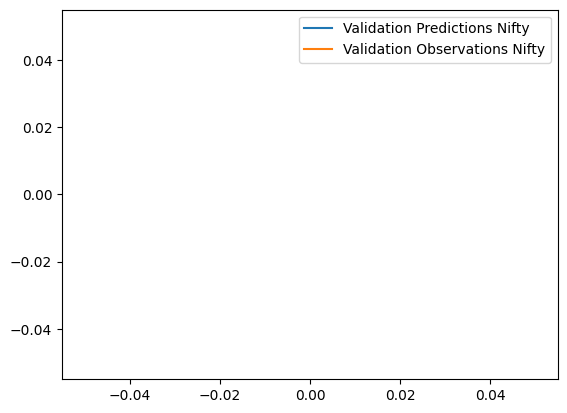

In [ ]:
# For Nifty
hj18_val_predictions_nifty = hj18_model_nifty.predict(hj18_X_val_nifty).flatten()

plt.plot(hj18_dates_val_nifty, hj18_val_predictions_nifty)
plt.plot(hj18_dates_val_nifty, hj18_y_val_nifty)
plt.legend(['Validation Predictions Nifty', 'Validation Observations Nifty'])

plt.show

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


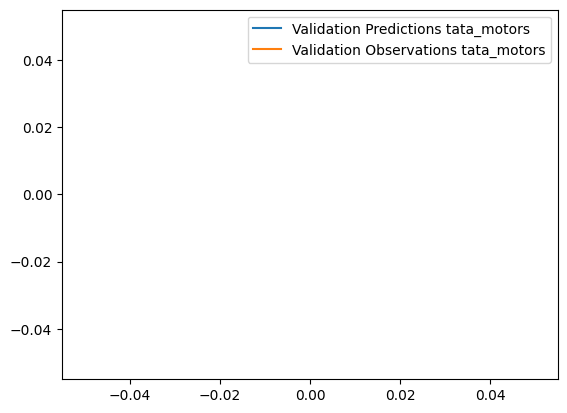

In [ ]:
# For tata_motors
hj18_val_predictions_tata_motors = hj18_model_tata_motors.predict(hj18_X_val_tata_motors).flatten()

plt.plot(hj18_dates_val_tata_motors, hj18_val_predictions_tata_motors)
plt.plot(hj18_dates_val_tata_motors, hj18_y_val_tata_motors)
plt.legend(['Validation Predictions tata_motors', 'Validation Observations tata_motors'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


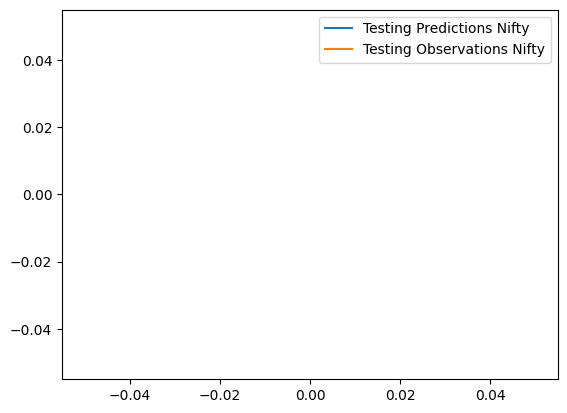

In [ ]:
# For Nifty
hj18_test_predictions_nifty = hj18_model_nifty.predict(hj18_X_test_nifty).flatten()

plt.plot(hj18_dates_test_nifty, hj18_test_predictions_nifty)
plt.plot(hj18_dates_test_nifty, hj18_y_test_nifty)
plt.legend(['Testing Predictions Nifty', 'Testing Observations Nifty'])


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


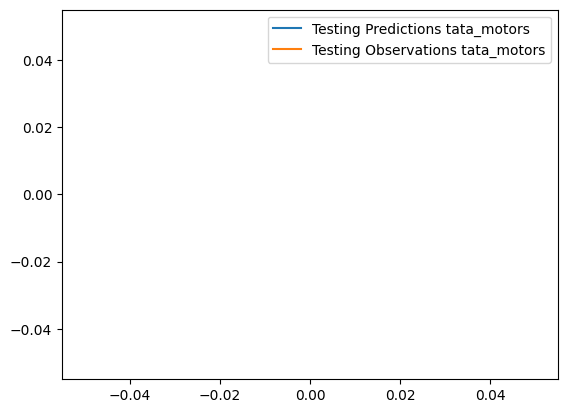

In [75]:
# For tata_motors
hj18_test_predictions_tata_motors = hj18_model_tata_motors.predict(hj18_X_test_tata_motors).flatten()

plt.plot(hj18_dates_test_tata_motors, hj18_test_predictions_tata_motors)
plt.plot(hj18_dates_test_tata_motors, hj18_y_test_tata_motors)
plt.legend(['Testing Predictions tata_motors', 'Testing Observations tata_motors'])

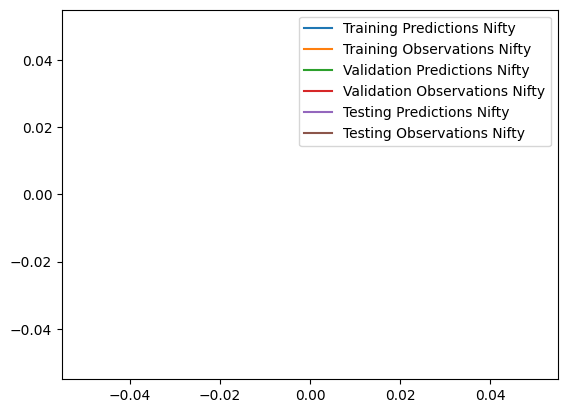

In [76]:
# For Nifty
plt.plot(hj18_dates_train_nifty, hj18_train_predictions_nifty)
plt.plot(hj18_dates_train_nifty, hj18_y_train_nifty)
plt.plot(hj18_dates_val_nifty, hj18_val_predictions_nifty)
plt.plot(hj18_dates_val_nifty, hj18_y_val_nifty)
plt.plot(hj18_dates_test_nifty, hj18_test_predictions_nifty)
plt.plot(hj18_dates_test_nifty, hj18_y_test_nifty)
plt.legend(['Training Predictions Nifty',
            'Training Observations Nifty',
            'Validation Predictions Nifty',
            'Validation Observations Nifty',
            'Testing Predictions Nifty',
            'Testing Observations Nifty'])



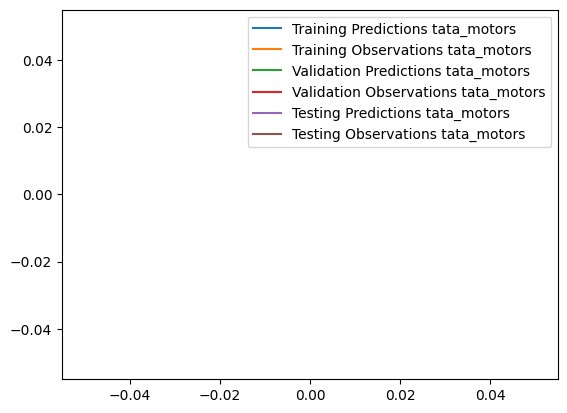

In [77]:
# For tata_motors
plt.plot(hj18_dates_train_tata_motors, hj18_train_predictions_tata_motors)
plt.plot(hj18_dates_train_tata_motors, hj18_y_train_tata_motors)
plt.plot(hj18_dates_val_tata_motors, hj18_val_predictions_tata_motors)
plt.plot(hj18_dates_val_tata_motors, hj18_y_val_tata_motors)
plt.plot(hj18_dates_test_tata_motors, hj18_test_predictions_tata_motors)
plt.plot(hj18_dates_test_tata_motors, hj18_y_test_tata_motors)
plt.legend(['Training Predictions tata_motors',
            'Training Observations tata_motors',
            'Validation Predictions tata_motors',
            'Validation Observations tata_motors',
            'Testing Predictions tata_motors',
            'Testing Observations tata_motors'])

In [78]:
# For Nifty
from copy import deepcopy

hj18_recursive_predictions_nifty = []
hj18_recursive_dates_nifty = np.concatenate([hj18_dates_val_nifty, hj18_dates_test_nifty])

for hj18_target_date in hj18_recursive_dates_nifty:
  hj18_last_window = deepcopy(hj18_X_train_nifty[-1])
  hj18_next_prediction = hj18_model_nifty.predict(np.array([hj18_last_window])).flatten()
  hj18_recursive_predictions_nifty.append(hj18_next_prediction)
  hj18_last_window[-1] = hj18_next_prediction

# For tata_motors
hj18_recursive_predictions_tata_motors = []
hj18_recursive_dates_tata_motors = np.concatenate([hj18_dates_val_tata_motors, hj18_dates_test_tata_motors])

for hj18_target_date in hj18_recursive_dates_tata_motors:
  hj18_last_window = deepcopy(hj18_X_train_tata_motors[-1])
  hj18_next_prediction = hj18_model_tata_motors.predict(np.array([hj18_last_window])).flatten()
  hj18_recursive_predictions_tata_motors.append(hj18_next_prediction)
  hj18_last_window[-1] = hj18_next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━

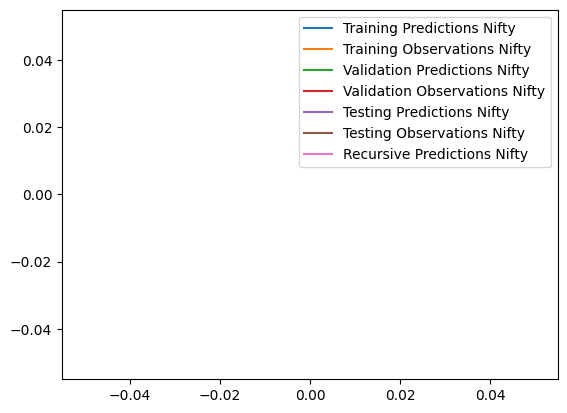

In [79]:
# For Nifty
plt.plot(hj18_dates_train_nifty, hj18_train_predictions_nifty)
plt.plot(hj18_dates_train_nifty, hj18_y_train_nifty)
plt.plot(hj18_dates_val_nifty, hj18_val_predictions_nifty)
plt.plot(hj18_dates_val_nifty, hj18_y_val_nifty)
plt.plot(hj18_dates_test_nifty, hj18_test_predictions_nifty)
plt.plot(hj18_dates_test_nifty, hj18_y_test_nifty)
plt.plot(hj18_recursive_dates_nifty, hj18_recursive_predictions_nifty)
plt.legend(['Training Predictions Nifty',
            'Training Observations Nifty',
            'Validation Predictions Nifty',
            'Validation Observations Nifty',
            'Testing Predictions Nifty',
            'Testing Observations Nifty',
            'Recursive Predictions Nifty'])



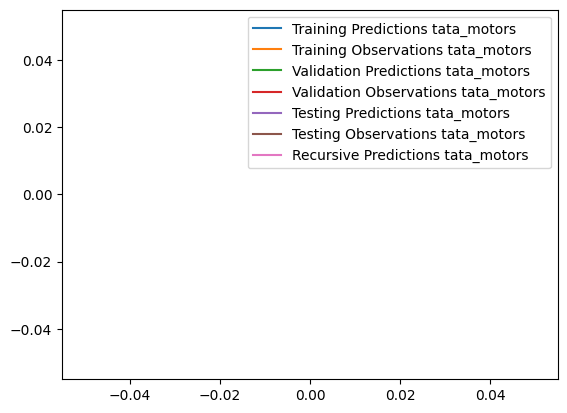

In [80]:
# For tata_motors
plt.plot(hj18_dates_train_tata_motors, hj18_train_predictions_tata_motors)
plt.plot(hj18_dates_train_tata_motors, hj18_y_train_tata_motors)
plt.plot(hj18_dates_val_tata_motors, hj18_val_predictions_tata_motors)
plt.plot(hj18_dates_val_tata_motors, hj18_y_val_tata_motors)
plt.plot(hj18_dates_test_tata_motors, hj18_test_predictions_tata_motors)
plt.plot(hj18_dates_test_tata_motors, hj18_y_test_tata_motors)
plt.plot(hj18_recursive_dates_tata_motors, hj18_recursive_predictions_tata_motors)
plt.legend(['Training Predictions tata_motors',
            'Training Observations tata_motors',
            'Validation Predictions tata_motors',
            'Validation Observations tata_motors',
            'Testing Predictions tata_motors',
            'Testing Observations tata_motors',
            'Recursive Predictions tata_motors'])